# Submitted by Krishnan C S
## PG ID: 12420068

## Libraries

In [1]:
# Import libraries

import numpy as np # Handle numeric data
import pandas as pd # Dataframe creation and transformations

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from itertools import combinations # Helpful for pairwise calculations.

In [2]:
from scipy.stats import multivariate_normal # Parzen window
from scipy.spatial.distance import cdist # Euclidian distance calculation for Parzen window

# Sklearn libraries
from sklearn.decomposition import PCA # PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # For Fisher

from sklearn.preprocessing import MinMaxScaler, StandardScaler # Scaling
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn.manifold import MDS, TSNE # For class visualization
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.metrics import accuracy_score # Accuracy metric for evaluation.
from sklearn.linear_model import Perceptron, LogisticRegression # Perceptron and logistic regression


## Load and process data

In [3]:
# Read the data
df_tmnst = pd.read_csv('tmnst Dataset.csv')

In [4]:
# Check for null values
df_tmnst.isnull().sum().sum()

np.int64(0)

In [5]:
# Separate target variable and independent variables
X_tmnst = df_tmnst.drop(columns=['labels'])
y_tmnst = df_tmnst['labels']

In [6]:
# Impute null by linear interpolation
X_imputed = X_tmnst.interpolate(method='linear', axis=1, limit_direction='both')
X_imputed.isnull().sum().sum()

np.int64(0)

In [7]:
# Scale the data so that the values are between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_imputed)

In [8]:
# Create train and test data
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(X_scaled, y_tmnst, test_size=0.3, random_state=10, stratify=y_tmnst)

In [9]:
# Create a consolidated train and test data for use in functions
train_df_global = pd.DataFrame(X_train_global, columns=X_tmnst.columns)
train_df_global['labels'] = np.array(y_train_global)

test_df_global = pd.DataFrame(X_test_global, columns=X_tmnst.columns)
test_df_global['labels'] = np.array(y_test_global)

## Problem 1: PCA vs Fisher 3D

### Functions

In [10]:
def pca_vs_fisher_3d(train, clss = ['A', 'C', 'O', 'X']):
  '''
  Calculates the PCA and Fisher projections for a given dataset.
  Input: Dataset containing pixel information for all classes.
  Output: Returns the PCA and Fisher projections.
  '''
  # Filter DF based on the classes provided as input
  filtered_df = train[train['labels'].isin(clss)]
  filtered_X = filtered_df.drop(columns=['labels'])
  filtered_y = filtered_df['labels']

  # Apply PCA to extract the first 3 components
  pca = PCA(n_components=3)
  X_pca = pca.fit_transform(filtered_X)

  # Apply Fisher projection
  lda = LDA(n_components=3)
  X_lda = lda.fit_transform(filtered_X, filtered_y)

  return X_pca, X_lda, filtered_y

In [11]:
# Function for 3D-plot of PCA and LDA
def plot_pca_vs_fisher_3d(X_pca, X_lda, y):
  '''
  Create 3D plots for PCA and Fisher projections.
  PCA and Fisher plots are shown side by side.
  Input: PCA and Fisher projections.
  '''
  labels_unique = np.unique(y)
  label_to_color = {
    labels_unique[0]: 'red',
    labels_unique[1]: 'green',
    labels_unique[2]: 'blue',
    labels_unique[3]: 'cyan'}
  fig = plt.figure(figsize=(14, 6))
  ax1 = fig.add_subplot(1, 2, 1, projection='3d')
  for i, label in enumerate(labels_unique):
    idx = y == label
    ax1.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2],
                color=label_to_color[label], label=label, alpha=0.7, s=40)

  ax1.set_title("3D PCA")
  ax1.set_xlabel("PC1")
  ax1.set_ylabel("PC2")
  ax1.set_zlabel("PC3")

  ax2 = fig.add_subplot(1, 2, 2, projection='3d')
  for i, label in enumerate(labels_unique):
    idx = y == label
    ax2.scatter(X_lda[idx, 0], X_lda[idx, 1], X_lda[idx, 2],
                color=label_to_color[label], label=label, alpha=0.7, s=40)

  ax2.set_title("3D Fisher")
  ax2.set_xlabel("LDA1")
  ax2.set_ylabel("LDA2")
  ax2.set_zlabel("LDA3")

  fig.suptitle("PCA vs Fisher Projection", fontsize=14)
  ax2.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

### Part 1: PCA Projection

In [12]:
# Calculate PCA and Fisher projections.
X_pca_matrix, X_lda_matrix, y_lda_vector = pca_vs_fisher_3d(train_df_global, ['A','C','O','X'])

In [13]:
# Print PCA projection
print(X_pca_matrix)

[[ 4.03770782 -1.59664184  3.53250481]
 [-5.22481326  1.41332331  1.22187757]
 [-2.91724397  5.94543859  0.32481292]
 ...
 [ 2.40404489  0.71737739  1.25224532]
 [-0.64683536  3.40289985  0.27471034]
 [ 3.98423394 -0.62138749  3.79557152]]


### Part 2: Fisher Projection

In [14]:
# Print LDA projection
print(X_lda_matrix)

[[-8.29320702 -2.340302    0.49197591]
 [ 4.16887644 -0.85188131  5.12901575]
 [ 3.76676252  0.58656403  5.28504606]
 ...
 [-7.9787398  -2.05790704  1.16783349]
 [ 0.54248658 -4.23150553 -6.32208032]
 [-7.19638743 -1.66488919  0.29601724]]


### Plot PCA and Fisher projections for combinations of 4 classes

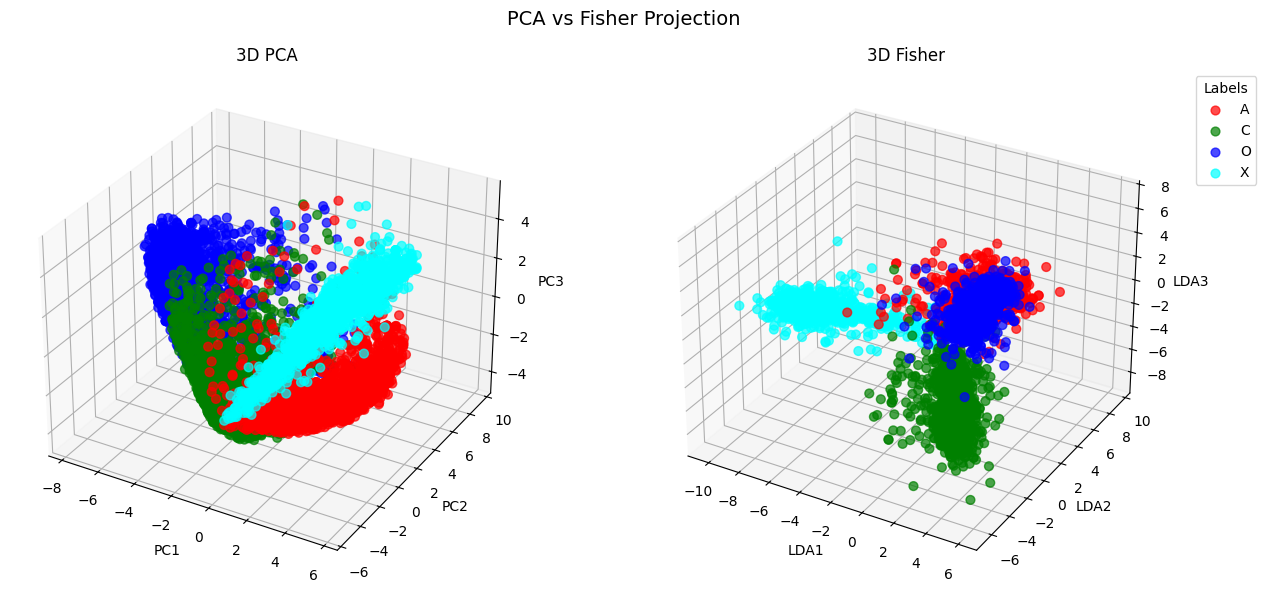

In [15]:
# Classes mentioned in Problem 1
X_pca_1, X_lda_1, y_lda_1 = pca_vs_fisher_3d(train_df_global, ['A','C','O','X'])
plot_pca_vs_fisher_3d(X_pca_1, X_lda_1, y_lda_1)

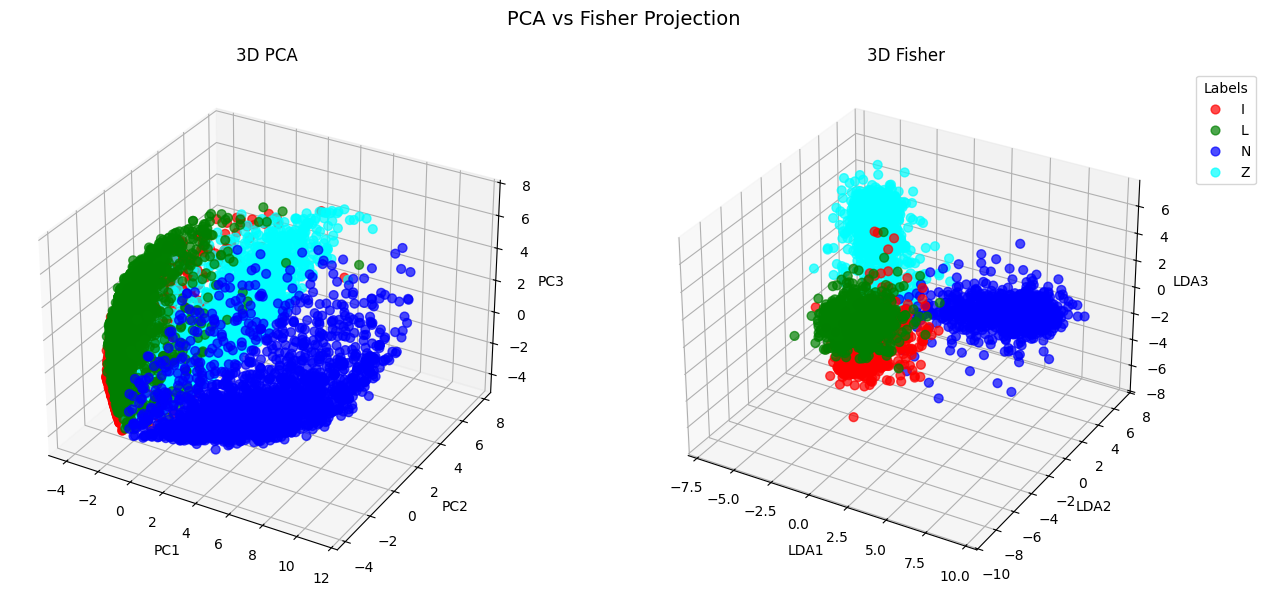

In [16]:
# Choice 1
X_pca_2, X_lda_2, y_lda_2 = pca_vs_fisher_3d(train_df_global,['Z','N','L','I'])
plot_pca_vs_fisher_3d(X_pca_2, X_lda_2, y_lda_2)

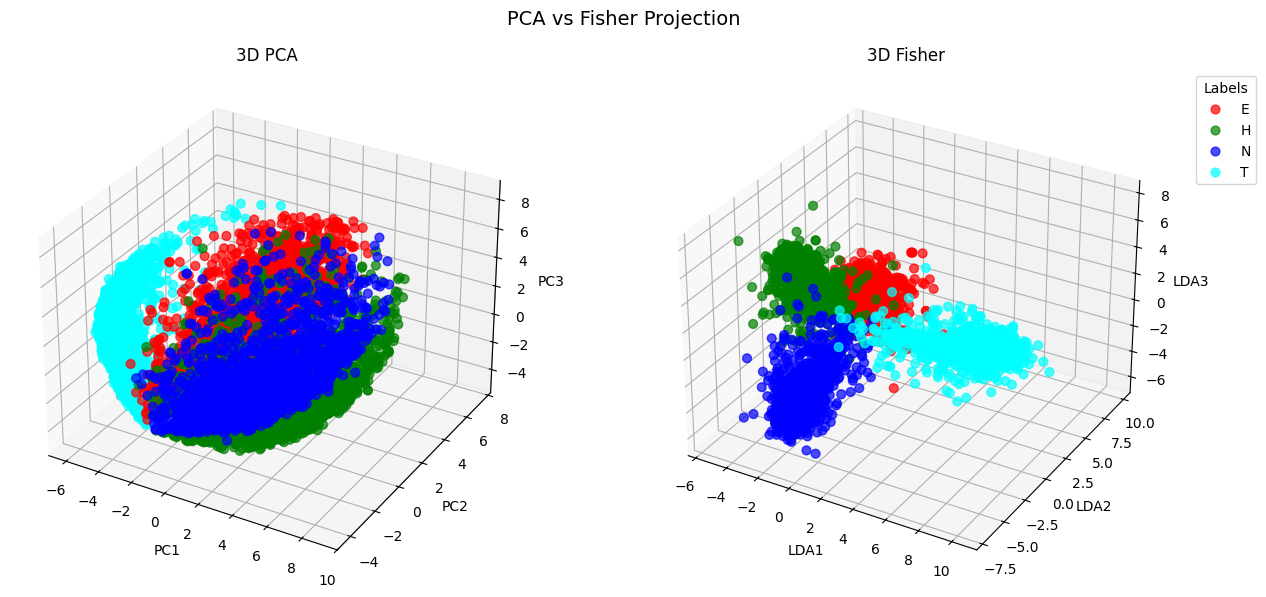

In [17]:
# Choice 2
X_pca_3, X_lda_3, y_lda_3 = pca_vs_fisher_3d(train_df_global,['T','H','E','N'])
plot_pca_vs_fisher_3d(X_pca_3, X_lda_3, y_lda_3)

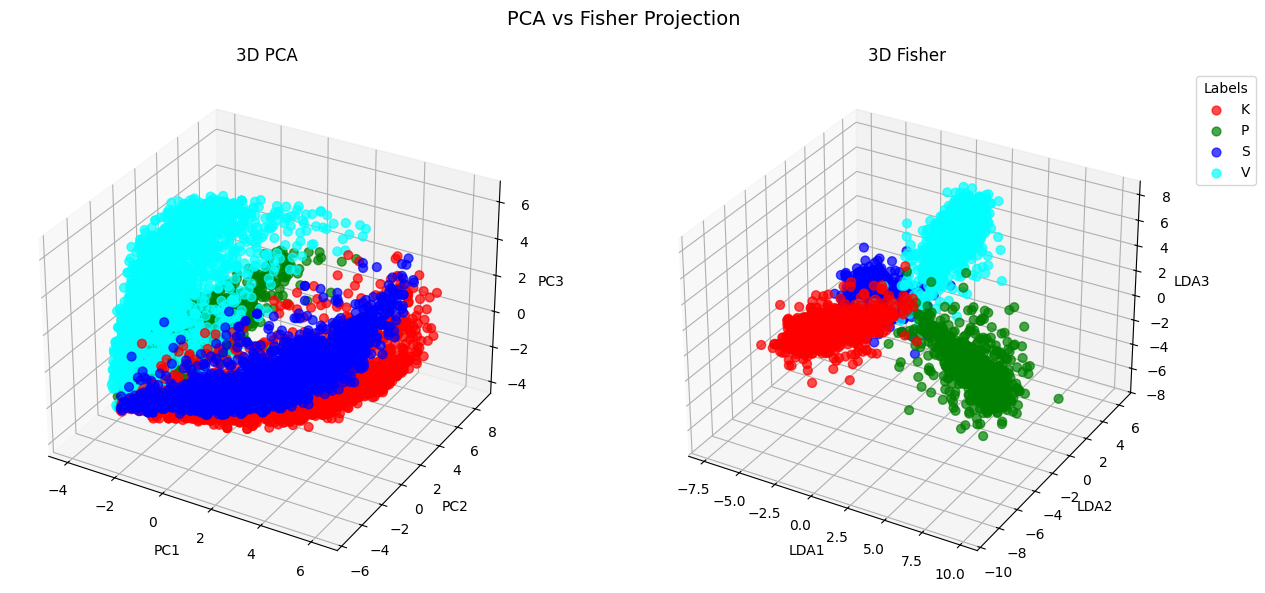

In [18]:
# Choice 3
X_pca_4, X_lda_4, y_lda_4 = pca_vs_fisher_3d(train_df_global,['S','K','V','P'])
plot_pca_vs_fisher_3d(X_pca_4, X_lda_4, y_lda_4)

### Summary
* Both PCA and Fisher are dimensionality reduction techniques.
* PCA projects data on to a direction where variance is maximum. The variances in subsequent axes are lower. As a result, the classes get squished.
* Fisher projection is a discriminant classifier. It separates the classes.
* The 3D plots confirm these behaviour.

## Problem 2: Visualizing all classes via their Fisher Distance

### Functions

In [19]:
# Function to calculate pairwise fisher discriminant.
def fisher_discriminant_score(grouped, feature_cols):
    '''
    Calculate fisher discriminant scores for pairs of classes.
    Input: A dataframe grouped by classes as a grouped object
    '''
    labels = grouped.groups.keys()
    pair_scores = []

    # If feature columns aren't specified, infer from the first group
    if feature_cols is None:
        feature_cols = grouped.get_group(next(iter(labels))).columns

    for class1, class2 in combinations(labels, 2):
        X1 = grouped.get_group(class1)[feature_cols].values
        X2 = grouped.get_group(class2)[feature_cols].values

        mu1, mu2 = X1.mean(axis=0), X2.mean(axis=0)
        var1, var2 = X1.var(axis=0), X2.var(axis=0)
        n1, n2 = len(X1), len(X2)

        score_vector = (mu1 - mu2)**2 / (n1 * var1 + n2 * var2 + 1e-8)
        fisher_score = np.mean(score_vector)

        pair_scores.append({
            'Class 1': class1,
            'Class 2': class2,
            'Fisher Score': fisher_score
        })

    return pd.DataFrame(pair_scores)

### Part 1: Fisher Distance Computation

In [20]:
# Create Fisher discriminant matrix
grouped_labels = train_df_global.groupby('labels')
feature_cols = [col for col in train_df_global.columns if col != 'labels']
fisher_df = fisher_discriminant_score(grouped_labels, feature_cols)
fisher_df.to_csv('fisher.csv', index=False)
print(fisher_df)

    Class 1 Class 2  Fisher Score
0         A       B      0.000144
1         A       C      0.000170
2         A       D      0.000170
3         A       E      0.000158
4         A       F      0.000152
..      ...     ...           ...
320       W       Y      0.000223
321       W       Z      0.000229
322       X       Y      0.000162
323       X       Z      0.000115
324       Y       Z      0.000209

[325 rows x 3 columns]


### Summary
* The Fisher score between two pairs of classes is an indicator of class separation.
* Higher values indicate better separation.

### Part 2: Class Visualization using t-SNE/MDS

In [21]:
# Create the Fisher matrix
all_labels = sorted(y_tmnst.unique())
fisher_matrix = pd.DataFrame(0.0, index=all_labels, columns=all_labels)

# Fill upper and lower triangles of the matrix, leaving the diagonal values as zero.
for _, row in fisher_df.iterrows():
    a, b = row["Class 1"], row["Class 2"]
    score = row["Fisher Score"]
    fisher_matrix.loc[a, b] = score
    fisher_matrix.loc[b, a] = score  # symmetric

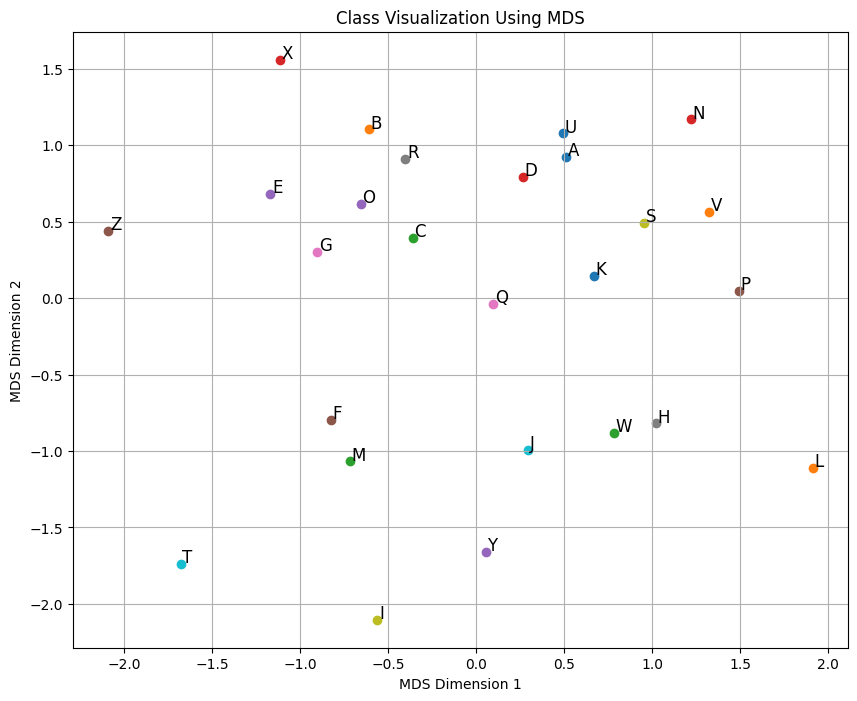

In [22]:
# Set up MDS for plotting
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(fisher_matrix.values)

coords_scaled = StandardScaler().fit_transform(coords)

# Plot
plt.figure(figsize=(10, 8))
for i, label in enumerate(fisher_matrix.index):
    x, y = coords_scaled[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, label, fontsize=12)
plt.title("Class Visualization Using MDS")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()

### Summary
* MDS plots show all the classes on a two-dimensional plane.
* The values from fisher distance computation data can be used to validate the plot.

## Problem 3: KNN and Parzen Window classifiers hyper parameter sweeps

### Functions

In [23]:
def knn_sweep(train, test, K = [1, 3, 5, 7, 9, 11, 13, 15, 17]):
  '''
  Function to perform KNN hyperparameter sweep
  Input: Train data, test data, Hyperparameter K
  Output: Result should train and test accuracy for each K
  '''
  X_train = train.drop(columns=['labels'])
  y_train = train['labels']
  X_test = test.drop(columns=['labels'])
  y_test = test['labels']
  results = []

  # Perform hyperparameter sweep and store results
  for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_acc = np.round(accuracy_score(y_train, y_pred_train), 4)
    test_acc = np.round(accuracy_score(y_test, y_pred_test), 4)
    results.append({
        "K": k,
        "Train_Accuracy": train_acc,
        "Test_Accuracy": test_acc
        })

  return results

In [24]:
def parzen_sweep(train, test, sigma = [0.1, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 10]):
  '''
  Function to perform Parzen window hyperparameter sweep
  Input: Train data, test data, Hyperparameter sigma
  Output: Result should train and test accuracy for each sigma
  '''
  X_train = train.drop(columns="labels").values
  y_train = train["labels"].values
  X_test = test.drop(columns="labels").values
  y_test = test["labels"].values

  classes = np.unique(y_train)
  results = []

  # Perform hyperparameter sweep and store results
  for val in sigma:
    y_train_pred = parzen_predict(X_train, y_train, X_train, val, classes)
    y_test_pred = parzen_predict(X_train, y_train, X_test, val, classes)

    train_acc = np.round(accuracy_score(y_train, y_train_pred), 4)
    test_acc = np.round(accuracy_score(y_test, y_test_pred), 4)

    results.append({
        "sigma": val,
        "Train_Accuracy": train_acc,
        "Test_Accuracy": test_acc
        })

  return results

In [25]:
# Helper function: Estimate density p(x | class) using Parzen window with Gaussian kernel
def parzen_predict(X_train, y_train, X_test, sigma, classes):
    '''
    Input: X_train data, y_train data, X_test data, Hyperparameter sigma, classes
    Output: Predictions based on Parzen Window
    '''
    predictions = []
    d = X_train.shape[1]

    for c in classes:
        X_c = X_train[y_train == c]
        # Compute pairwise distances between test points and class-c train points
        dists = cdist(X_test, X_c, metric='euclidean')  # shape: (n_test, n_c)

        # Apply Gaussian kernel
        kernel_vals = np.exp(-0.5 * (dists / sigma)**2) / ((np.sqrt(2 * np.pi) * sigma) ** d)

        # Aggregate over training points
        class_likelihoods = kernel_vals.mean(axis=1)  # shape: (n_test,)
        if c == classes[0]:
            all_likelihoods = class_likelihoods[:, np.newaxis]
        else:
            all_likelihoods = np.hstack((all_likelihoods, class_likelihoods[:, np.newaxis]))

    # Predict class with highest likelihood
    y_pred = classes[np.argmax(all_likelihoods, axis=1)]
    return y_pred

### Project the 26 class, 784 dimensional data into 25 Fisher-dimensions.

In [26]:
# Get X_train, X_test, y_train, y_test from X_scaled
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_tmnst, test_size=0.3, random_state=10, stratify=y_tmnst)

# Dimensionality reduction using LDA
X_train_LDA = LDA(n_components=25).fit_transform(X_train, y_train)
X_test_LDA = LDA(n_components=25).fit_transform(X_test, y_test)

# Create a consolidated train and test data for use in functions
train_df_LDA = pd.DataFrame(X_train_LDA)
train_df_LDA['labels'] = np.array(y_train)

test_df_LDA = pd.DataFrame(X_test_LDA)
test_df_LDA['labels'] = np.array(y_test)

### KNN Hyperparameter Sweep

In [27]:
# Perform hyperparameter sweep and store results in a dataframe
knn_sweep_results = knn_sweep(train_df_LDA, test_df_LDA)
knn_sweep_df = pd.DataFrame(knn_sweep_results)
knn_sweep_df

,K,Train_Accuracy,Test_Accuracy
0,1,1.0000,0.9371
1,3,0.9698,0.9387
2,5,0.9616,0.9380
3,7,0.9565,0.9372
4,9,0.9538,0.9371
5,11,0.9514,0.9364
6,13,0.9494,0.9359
7,15,0.9480,0.9346
8,17,0.9465,0.9342


In [28]:
# Save dataframe in csv
knn_sweep_df.to_csv('Knn.csv', index=False)

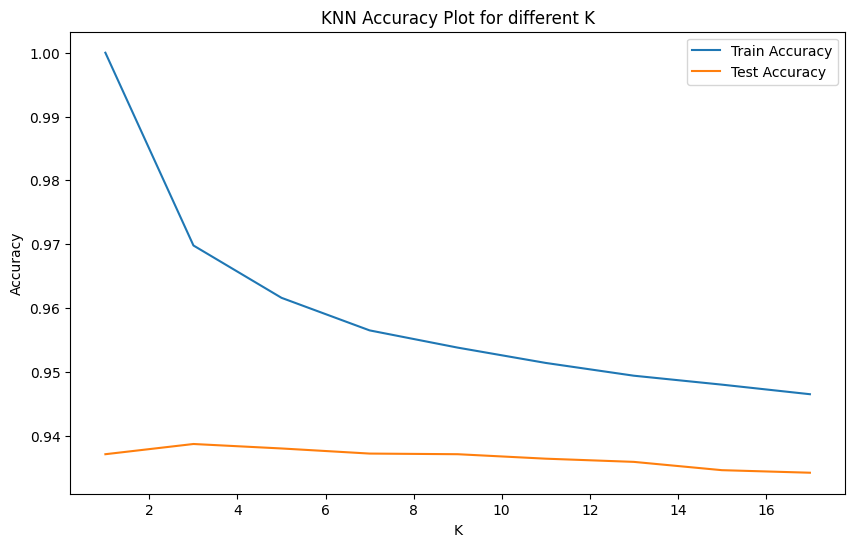

In [29]:
# Plot accuracies vs hyperparameter
plt.figure(figsize=(10, 6))
plt.plot(knn_sweep_df['K'], knn_sweep_df['Train_Accuracy'], label='Train Accuracy')
plt.plot(knn_sweep_df['K'], knn_sweep_df['Test_Accuracy'], label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Plot for different K')
plt.legend()
plt.show()

### Summary
* When k = 1, each test point is classified based on its nearest neighbour.
* A test accuracy of 1.0 indicates that the classes are well-separated. For each point, the nearest neighbour belonged to the same class.
* At higher values of k, say 17, the effect of 17 nearest points would be considered. It is possible that some test points are misclassified.

### Parzen Window Hyperparameter Sweep

In [30]:
# Perform hyperparameter sweep and store results in a dataframe
pw_sweep_results = parzen_sweep(train_df_LDA, test_df_LDA)
pw_sweep_df = pd.DataFrame(pw_sweep_results)
pw_sweep_df

,sigma,Train_Accuracy,Test_Accuracy
0,0.1,1.0000,0.7399
1,0.5,0.9999,0.9405
2,1.0,0.9963,0.9411
3,1.5,0.9767,0.9289
4,2.0,0.9413,0.9126
5,3.0,0.9018,0.8896
6,4.0,0.8914,0.8801
7,6.0,0.8849,0.8730
8,8.0,0.8825,0.8705
9,10.0,0.8814,0.8696


In [31]:
# Save dataframe in csv
pw_sweep_df.to_csv('Parzen.csv', index=False)

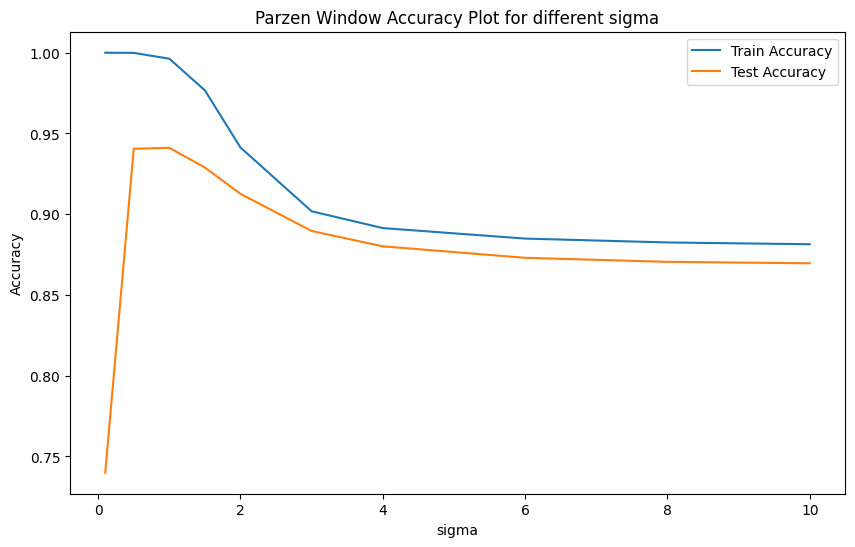

In [32]:
# Plot accuracies vs hyperparameter
plt.figure(figsize=(10, 6))
plt.plot(pw_sweep_df['sigma'], pw_sweep_df['Train_Accuracy'], label='Train Accuracy')
plt.plot(pw_sweep_df['sigma'], pw_sweep_df['Test_Accuracy'], label='Test Accuracy')
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Parzen Window Accuracy Plot for different sigma')
plt.legend()
plt.show()

### Summary
* When sigma is small, say less than 1, the Kernel is narrow (smaller window).
* Within a smaller window, the accuracy is very high, since we have a clean dataset with well-separated classes.
* At higher values of sigma, the Kernel is wider and a few points from another class is getting captured. Hence, the slight dip in accuracy.

## Problem 4: Perceptron vs. Logistic Regression

### Functions

In [33]:
def perceptron_model(train, test, classes=['A', 'C']):
    """
    Trains and evaluates a Perceptron model for binary classification.
    Input: Train data, test data, a pair of classes
    Output: Training accuracy and testing accuracy.
    """
    # Filter dataframes for the specified classes
    filtered_train_df = train[train['labels'].isin(classes)]
    filtered_test_df = test[test['labels'].isin(classes)]

    # Separate features and target variable
    X_train = filtered_train_df.drop(columns=['labels'])
    y_train = filtered_train_df['labels']
    X_test = filtered_test_df.drop(columns=['labels'])
    y_test = filtered_test_df['labels']

    # Convert labels to binary
    label_map = {classes[0]: 0, classes[1]: 1}
    y_train_binary = y_train.map(label_map)
    y_test_binary = y_test.map(label_map)

    # Initialize and train Perceptron model
    perceptron = Perceptron(random_state=None)
    perceptron.fit(X_train, y_train_binary)

    # Predict and calculate accuracies
    y_pred_train = perceptron.predict(X_train)
    y_pred_test = perceptron.predict(X_test)

    train_accuracy = accuracy_score(y_train_binary, y_pred_train)
    test_accuracy = accuracy_score(y_test_binary, y_pred_test)

    return train_accuracy, test_accuracy

In [34]:
def logistic_model(train, test, classes=['A', 'C']):
    """
    Trains and evaluates a Logistic Regression model for binary classification.
    Input: Train data, test data, a pair of classes
    Output: Training accuracy and testing accuracy.
    """
    # Filter dataframes for the specified classes
    filtered_train_df = train[train['labels'].isin(classes)]
    filtered_test_df = test[test['labels'].isin(classes)]

    # Separate features and target variable
    X_train = filtered_train_df.drop(columns=['labels'])
    y_train = filtered_train_df['labels']
    X_test = filtered_test_df.drop(columns=['labels'])
    y_test = filtered_test_df['labels']

    # Convert labels to binary
    label_map = {classes[0]: 0, classes[1]: 1}
    y_train_binary = y_train.map(label_map)
    y_test_binary = y_test.map(label_map)

    # Initialize and train Logistic Regression model
    logistic_regression = LogisticRegression(random_state=None)
    logistic_regression.fit(X_train, y_train_binary)

    # Predict and calculate accuracies
    y_pred_train = logistic_regression.predict(X_train)
    y_pred_test = logistic_regression.predict(X_test)

    train_accuracy = accuracy_score(y_train_binary, y_pred_train)
    test_accuracy = accuracy_score(y_test_binary, y_pred_test)

    return train_accuracy, test_accuracy

### Perceptron model

In [35]:
# Run model with 100 random initializations
perceptron_train_accuracies = []
perceptron_test_accuracies = []

# Save the accuracies for 100 runs
for _ in range(100):
    ptrain_acc, ptest_acc = perceptron_model(train_df_global, test_df_global, classes=['A', 'C'])
    perceptron_train_accuracies.append(ptrain_acc)
    perceptron_test_accuracies.append(ptest_acc)

In [36]:
# Create csv file with train and test accuracies
perceptron_accuracies_df = pd.DataFrame({
    'Train Accuracy': perceptron_train_accuracies,
    'Test Accuracy': perceptron_test_accuracies
})

perceptron_accuracies_df.to_csv('perceptron_A_C.csv', index=False)
perceptron_accuracies_df

,Train Accuracy,Test Accuracy
0,0.999751,0.995362
1,0.988069,0.986667
2,0.999254,0.995942
3,0.999254,0.995942
4,1.000000,0.994783
...,...,...
95,1.000000,0.995362
96,1.000000,0.995362
97,1.000000,0.995362
98,1.000000,0.995362


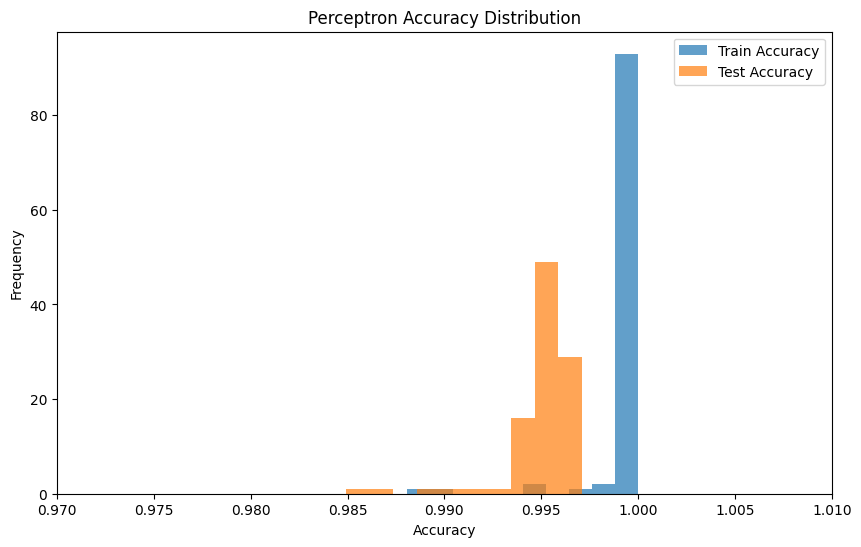

In [37]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(perceptron_train_accuracies, bins=10, alpha=0.7, label='Train Accuracy')
plt.hist(perceptron_test_accuracies, bins=10, alpha=0.7, label='Test Accuracy')
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Perceptron Accuracy Distribution")
plt.xlim(0.97, 1.01) # Restrict the x-axis to show only a certain range
plt.legend()
plt.show()

### Summary
* The perceptron algorithm is a linear classifier that updates weights only when it makes mistakes. It doesn't minimize a loss function.
* So, varying initializations can lead to different accuracy values.

### Logistic regression model

In [38]:
# Run model with 100 random initializations
logistic_train_accuracies = []
logistic_test_accuracies = []

# Save the accuracies for 100 runs
for _ in range(100):
    lrtrain_acc, lrtest_acc = logistic_model(train_df_global, test_df_global, classes=['A', 'C'])
    logistic_train_accuracies.append(lrtrain_acc)
    logistic_test_accuracies.append(lrtest_acc)

In [39]:
# Create csv file with train and test accuracies
logistic_regression_accuracies_df = pd.DataFrame({
    'Train Accuracy': logistic_train_accuracies,
    'Test Accuracy': logistic_test_accuracies
})

logistic_regression_accuracies_df.to_csv('logistic_A_C.csv', index=False)
logistic_regression_accuracies_df

,Train Accuracy,Test Accuracy
0,0.999751,0.996522
1,0.999751,0.996522
2,0.999751,0.996522
3,0.999751,0.996522
4,0.999751,0.996522
...,...,...
95,0.999751,0.996522
96,0.999751,0.996522
97,0.999751,0.996522
98,0.999751,0.996522


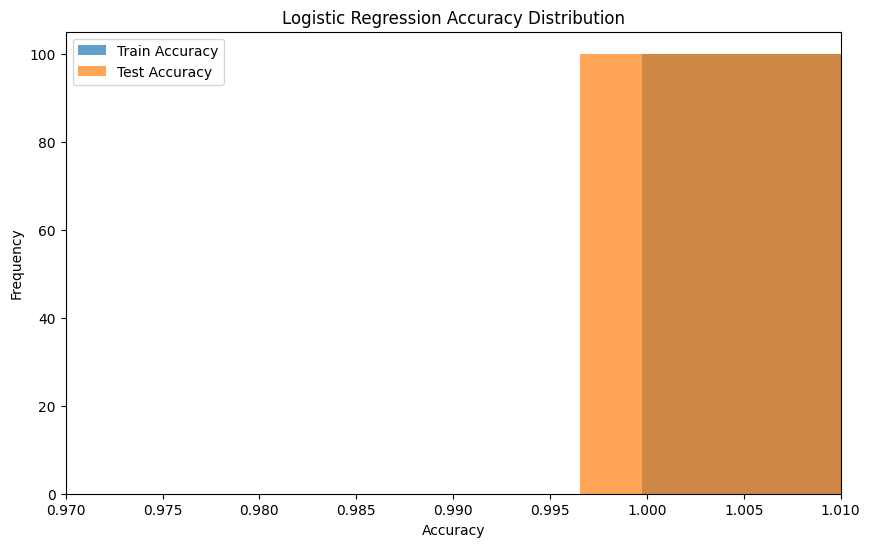

In [40]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(logistic_train_accuracies, bins=10, alpha=0.7, label='Train Accuracy')
plt.hist(logistic_test_accuracies, bins=10, alpha=0.7, label='Test Accuracy')
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Logistic Regression Accuracy Distribution")
plt.xlim(0.97, 1.01) # Restrict the x-axis to show only a certain range
plt.legend()
plt.show()

### Summary:
* Unlike the perceptron, the logistic regression model shows no variation in results.
* Since it minimizes a convex loss function using gradient descent, for the same data and hyperparameters, all initializations would converge to the same global minimum.
